#### Importing datasets and Preprocessing

In [5]:
import pandas as pd

df = pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 3 Linear Regression/Housing.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.shape

(545, 13)

In [11]:
df.duplicated().sum()

0

In [15]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("___"*10)

mainroad
yes    468
no      77
Name: count, dtype: int64
______________________________
guestroom
no     448
yes     97
Name: count, dtype: int64
______________________________
basement
no     354
yes    191
Name: count, dtype: int64
______________________________
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
______________________________
airconditioning
no     373
yes    172
Name: count, dtype: int64
______________________________
prefarea
no     417
yes    128
Name: count, dtype: int64
______________________________
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
______________________________


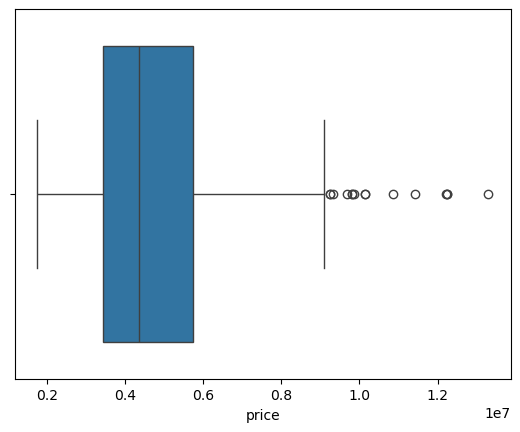

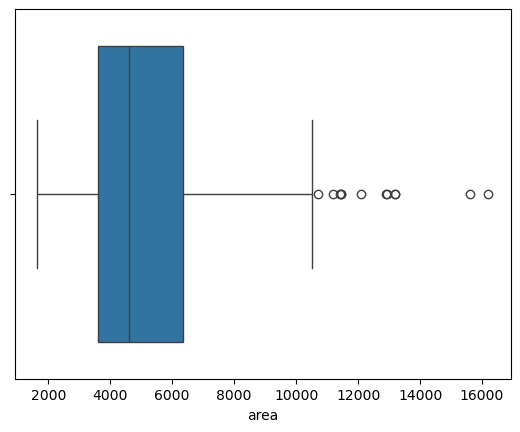

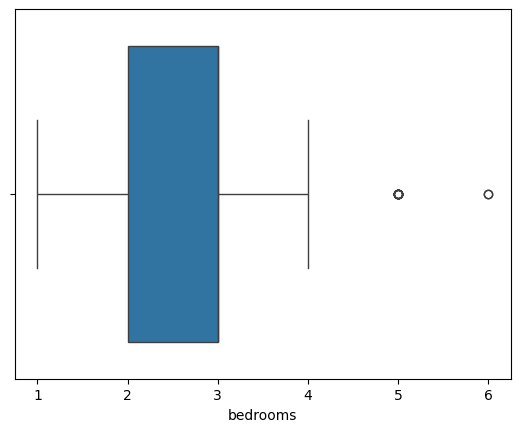

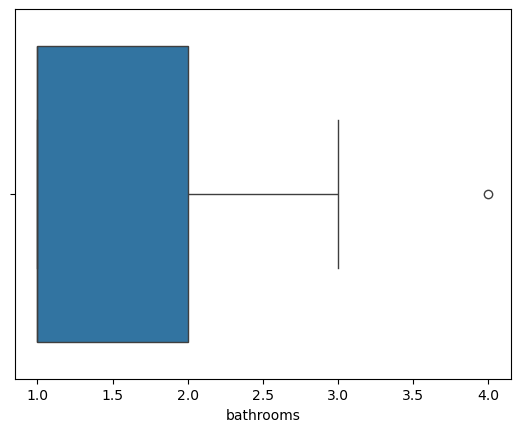

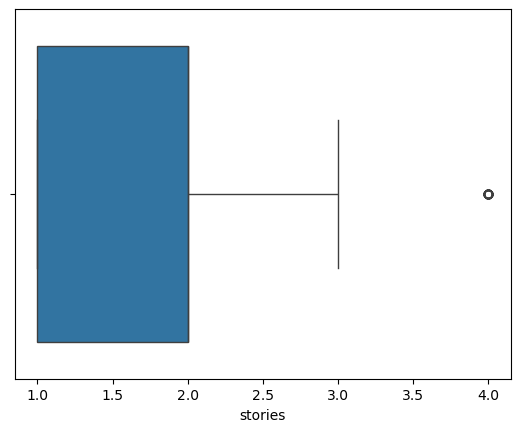

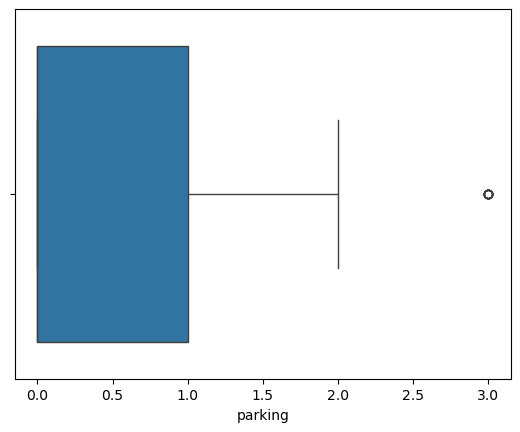

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [27]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [29]:
for i in ['price','area']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

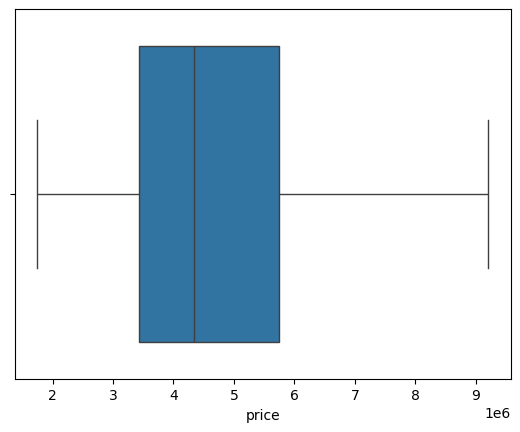

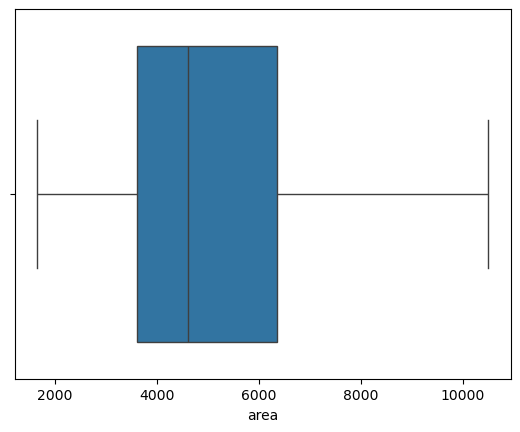

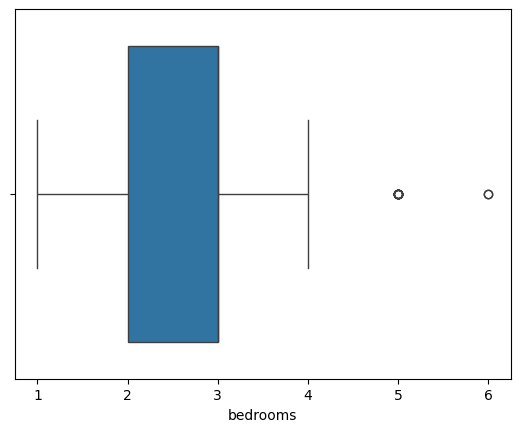

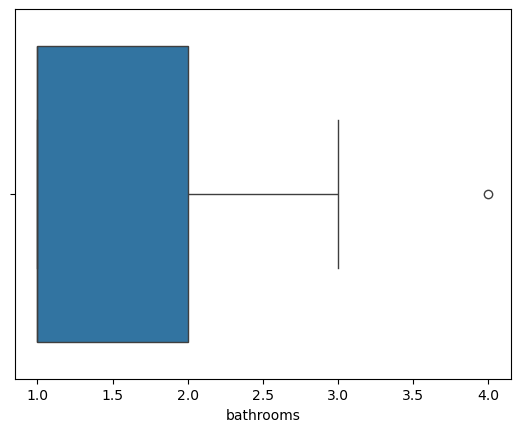

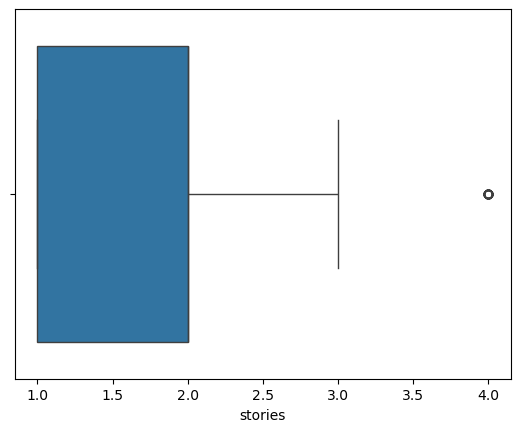

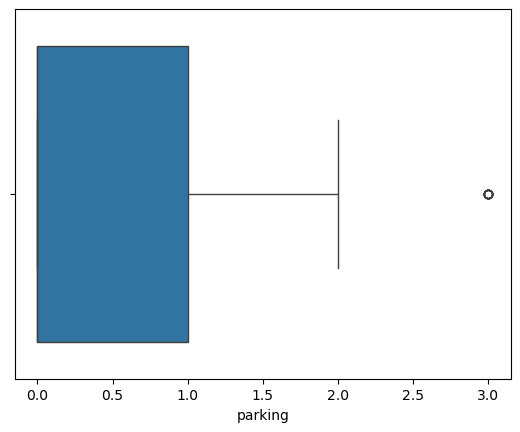

In [31]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

#### Inference from Data importing and preprocessing

Since there is no missing values ,duplicates and garbage values, so we don't need to preprocess those things. But we only have outliers for 
Price and Area column , so we did outlier treatment for these columns.

#### 2.Split data into train-test sets

In [64]:
from sklearn.model_selection import train_test_split

X=df.drop('price',axis=1)
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    train_size=0.8,
    random_state=50
)

In [47]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(436, 12) (109, 12)
(436,) (109,)


#### Standardizing the train and test sets of predictors

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in case dummies create mismatched columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


#### 3.Fit a Linear Regression model using sklearn.linear_model.

In [69]:
from sklearn.linear_model import LinearRegression

# Simple regression (using one feature: 'GrLivArea')
model_simple = LinearRegression()
model_simple.fit(X_train_scaled[:, [0]], y_train)  # First feature column

# Multiple regression (all features)
model_multiple = LinearRegression()
model_multiple.fit(X_train_scaled, y_train)

LinearRegression()

#### 4.Evaluate model using MAE, MSE, R².

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print(f"MAE: {mean_absolute_error(y, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
    print(f"R²: {r2_score(y, y_pred):.2f}")

print("Simple Regression Evaluation:")
evaluate_model(model_simple, X_test_scaled[:, [0]], y_test)

print("\nMultiple Regression Evaluation:")
evaluate_model(model_multiple, X_test_scaled, y_test)

Simple Regression Evaluation:
MAE: 1013978.19
MSE: 1784535678293.70
R²: 0.40

Multiple Regression Evaluation:
MAE: 714493.30
MSE: 768599785820.63
R²: 0.74


Overall Interpretation:

Multiple regression (using all features) predicts the target variable (e.g., house price) much more accurately than simple regression (using only one feature).

The average prediction error (MAE) and variance of errors (MSE) are both significantly lower for multiple regression.

The R² score is much higher for multiple regression, meaning it explains a much larger portion of the variability in the data.

In summary:

Multiple regression is a much better model for your data.

#### 5.Plot regression line and interpret coefficients.

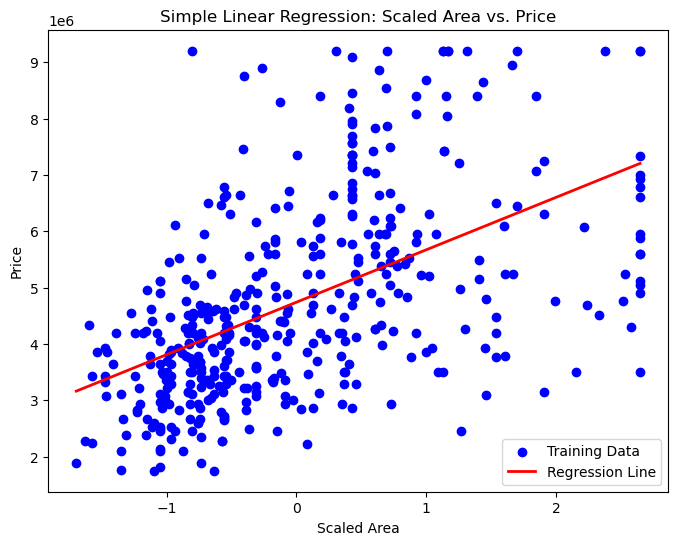

Coefficients for multiple regression model :
 [ 493930.9896869    78718.97765804  425276.83756388  391944.59768216
  202986.37625351  -97963.30934631   97963.30934631  -52470.8204226
   52470.8204226   -64640.46967538   64640.46967538 -103825.31397686
  103825.31397686 -196972.084429    196972.084429   -118150.69030794
  118150.69030794   46062.46322091   78031.41520141 -127554.78759702]
Intercept for multiple regression model : 4740925.321100918

Coefficients for simple regression model : 931507.0478251857
Intercept for simple regression model : 4740925.321100918


In [100]:
import matplotlib.pyplot as plt

# Get the slope (b) and intercept (a) from the simple regression model
b = model_simple.coef_[0]   # m(slope)
a = model_simple.intercept_   #c (intercept)

# Plot training data (scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label='Training Data')

# Generate regression line points
x_line = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y_line = a + b * x_line # y=m.x+c  (Linear Regression)

# Plot regression line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Scaled Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Scaled Area vs. Price')
plt.legend()
plt.show()

# Print coefficients and intercept
print("Coefficients for multiple regression model :\n", model_multiple.coef_)
print("Intercept for multiple regression model :", model_multiple.intercept_)

# Print coefficients and intercept
print("\nCoefficients for simple regression model :", model_simple.coef_[0])
print("Intercept for simple regression model :", model_simple.intercept_)


Interpretation:

If a house's area increases by one standard deviation above the mean, its predicted price increases by about $931,507.

A house with average area is predicted to cost about $4,740,925.

